# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [332]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons


> ### 1.1. Code for the distance function 


In [333]:
data= pd.read_csv('customer.csv')
data.head()


ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [334]:
# Normalize Data
#X = data.values
#sc = StandardScaler()
#sc.fit(X)
#X = sc.transform(X)


write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [335]:
def GUC_Distance (Cluster_Centroids, Data_points, Distance_Type):    
    Cluster_Distance  = np.zeros((Data_points.shape[0],Cluster_Centroids.shape[0]))
    cluster_centroids_np = np.array(Cluster_Centroids)
    Data_points_np = np.array(Data_points)
    for i in np.arange(Cluster_Centroids.shape[0]):
        #minus cintroids from data points using broadcasting
        difference = Data_points - Cluster_Centroids[i]
        if Distance_Type=='Ecluidian': 
             #square all each element 
            squared= np.square(difference)
            #sum all elements in the row in a row then square root and append value in the array
            Cluster_Distance[:,i] = np.sqrt(np.sum(squared, axis = 1))
           # print(difference)
            #print(np.linalg.norm(difference))
           # print(squared)
           #print(np.sqrt(np.sum(squared, axis = 1)))
        if Distance_Type=='pearson':
            Cluster_Distance[:,i] = np.sum(np.abs(difference), axis = 1)
    return Cluster_Distance 


In [336]:
cluster_centroids = np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])
Data_points =np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4],[5,5,5]])
distance_type = 'Ecluidian'
GUC_Distance(cluster_centroids, Data_points, distance_type)

array([[0.        , 1.73205081, 3.46410162, 5.19615242],
       [1.73205081, 0.        , 1.73205081, 3.46410162],
       [3.46410162, 1.73205081, 0.        , 1.73205081],
       [5.19615242, 3.46410162, 1.73205081, 0.        ],
       [6.92820323, 5.19615242, 3.46410162, 1.73205081]])

In [337]:
cluster_centroids = np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])
Data_points =np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4],[5,5,5]])
distance_type = 'pearson'
GUC_Distance(cluster_centroids, Data_points, distance_type)

array([[ 0.,  3.,  6.,  9.],
       [ 3.,  0.,  3.,  6.],
       [ 6.,  3.,  0.,  3.],
       [ 9.,  6.,  3.,  0.],
       [12.,  9.,  6.,  3.]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [382]:
# Generate random centroids
def GenerateRandomCentroids(Data_points,Number_of_Clusters):
    centroids = np.zeros((Number_of_Clusters, Data_points.shape[1]))
    random_index = np.random.permutation(Data_points.shape[0])
    centroids = Data_points[random_index[:Number_of_Clusters], :]
    centroids_np=np.array(centroids)
    return centroids
#Computing new centroids using mean of each cluster
def computing_new_Centroids(Data_points, index_of_clusters,Number_of_Clusters):
    new_centroids = np.zeros((Number_of_Clusters,Data_points.shape[1]))
    for i in np.arange(Number_of_Clusters):
        new_centroids[i] = np.mean(Data_points[index_of_clusters == i], axis = 0)
    return new_centroids
# computing the error

def Cost_function (Data_points,new_centroids,index_of_clusters):
    error=np.zeros(Data_points.shape[0])
    for i in range(Data_points.shape[0]):
        error[i]=np.sqrt(np.sum(np.square(Data_points[i] - new_centroids[index_of_clusters[i]])) )
    cost = np.sum(error, axis=0)
    return cost   

def GUC_Kmean (Data_points, Number_of_Clusters,  Distance_Type ):
    cluster_centroids=GenerateRandomCentroids(Data_points,Number_of_Clusters)
    #print (cluster_centroids)
    costfuc_old = 0
    costfuc_new = 1
    #flag = 0
    while (costfuc_old-costfuc_new)!=0:
        distances = GUC_Distance(cluster_centroids, Data_points, distance_type)
        index_of_clusters = np.argmin(distances, axis=1)
        #  print (index_of_clusters)
          # now we get new centroids
        new_Centroids = computing_new_Centroids(Data_points,index_of_clusters,Number_of_Clusters)  
          #print ('new',new_Centroids)
         #now i want to get cost function
        costfuc_old=costfuc_new
        costfuc_new = Cost_function (Data_points,new_Centroids,index_of_clusters)
    Cluster_Metric = costfuc_new/Data_points.shape[0]
   # print ('cost',Cluster_Metric)
               
    return [ new_Centroids , index_of_clusters,Cluster_Metric]    

In [352]:
#testing generating random centroids
def GenerateRandomCentroids(Data_points,Number_of_Clusters):
    m, n = Data_points.shape
    centroids = np.zeros((Number_of_Clusters, Data_points.shape[1]))
    random_index = np.random.permutation(Data_points.shape[0])
    centroids = Data_points[random_index[:Number_of_Clusters], :]
    return centroids
Data_points =np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4],[5,5,5]])
GenerateRandomCentroids(Data_points,3)

array([[4, 4, 4],
       [2, 2, 2],
       [1, 1, 1]])

In [353]:
#testing computing_new_Centroids
def computing_new_Centroids(Data_points, index_of_clusters,Number_of_Clusters):
    new_centroids = np.zeros((Number_of_Clusters,Data_points.shape[1]))
    for i in np.arange(Number_of_Clusters):
        new_centroids[i] = np.mean(Data_points[index_of_clusters == i], axis = 0)
    return new_centroids
Data_points =np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4],[5,5,5]])
index_of_clusters=[0, 0 ,1 ,1 ,2]
Number_of_Clusters = 3
computing_new_Centroids(Data_points, index_of_clusters,Number_of_Clusters)

array([[1.5, 1.5, 1.5],
       [3.5, 3.5, 3.5],
       [5. , 5. , 5. ]])

In [354]:
#Testing cost_function
def Cost_function (Data_points,new_centroids,index_of_clusters):
    error=np.zeros(Data_points.shape[0])
    for i in range(Data_points.shape[0]):
        error[i]=np.sqrt(np.sum(np.square(Data_points[i] - new_centroids[index_of_clusters[i]])) )
        cost = np.sum(error)
    return cost   
Data_points =np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4],[5,5,5]])
new_centroids = [[1.5,1.5, 1.5],[3.5, 3.5, 3.5], [5,  5,  5 ]]
index_of_clusters=[0, 0 ,1 ,1 ,2]
Cost_function (Data_points,new_centroids,index_of_clusters)

3.4641016151377544

In [375]:
#Testing kmeans
Data_points =np.array ([[1,1,1], [2,2,2], [3,3,3], [4,4,4],[5,5,5]])
GUC_Kmean (Data_points, 3 , 'Ecluidian' )



cost 0.6928203230275509


[array([[3.5, 3.5, 3.5],
        [1.5, 1.5, 1.5],
        [5. , 5. , 5. ]]),
 array([1, 1, 0, 0, 2], dtype=int64),
 0.6928203230275509]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [ ]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [356]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0, cluster_centers_ = [], labels_ = []):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels_==i,0],X[labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cluster_centers_[i][0],cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

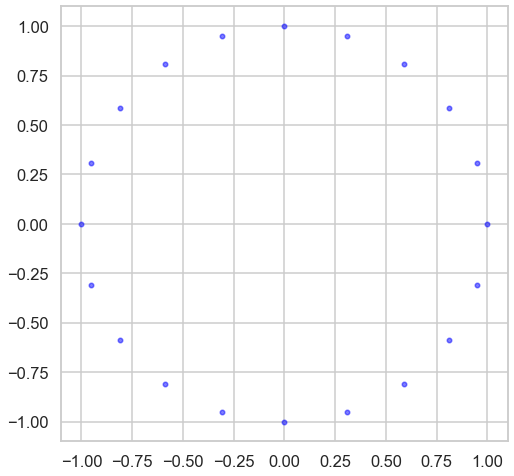

In [357]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

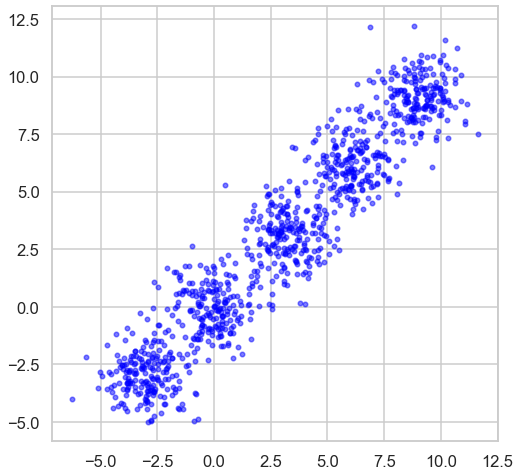

In [358]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

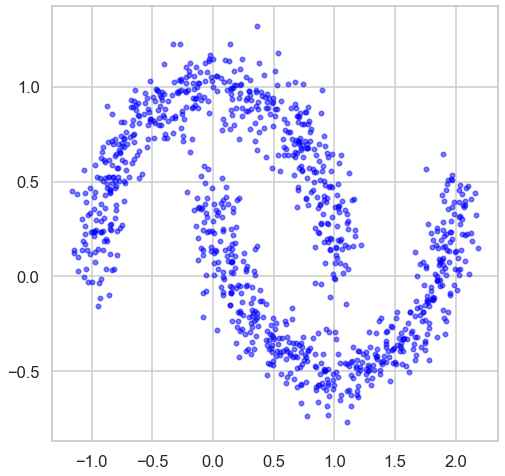

In [359]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

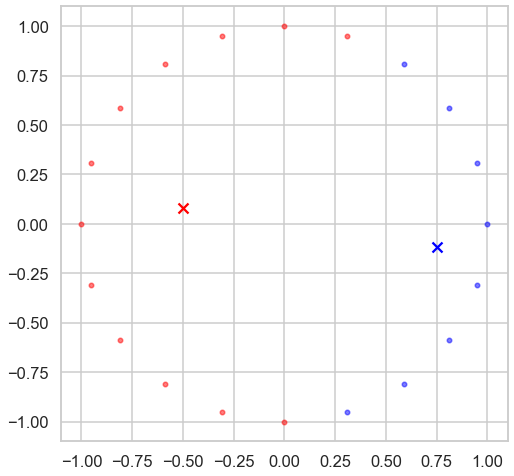

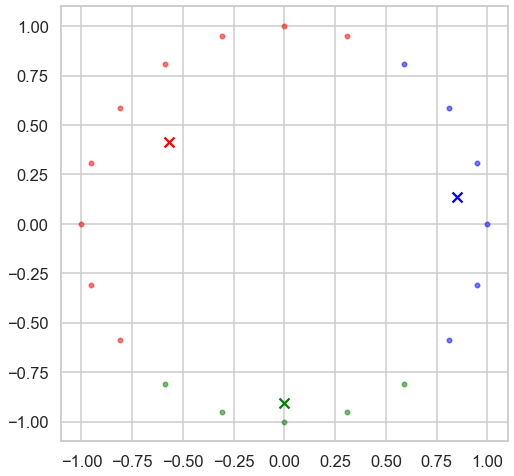

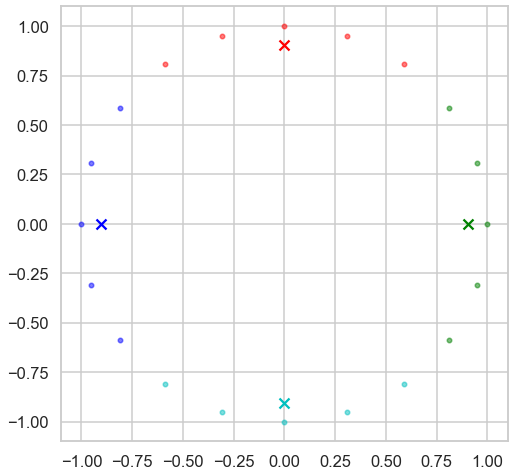

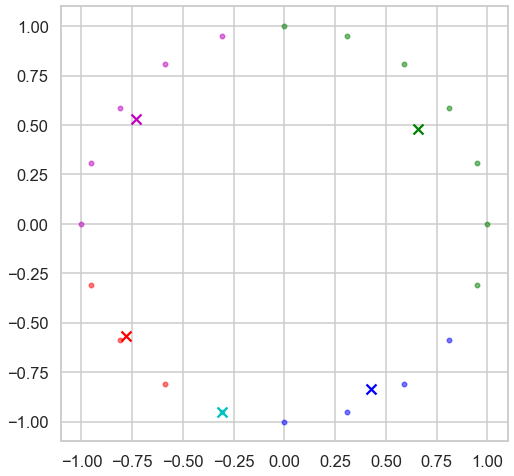

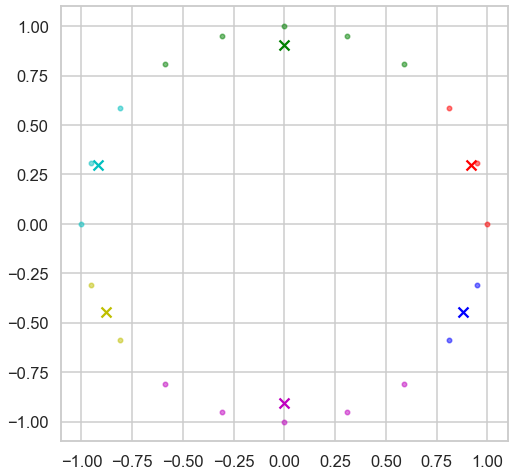

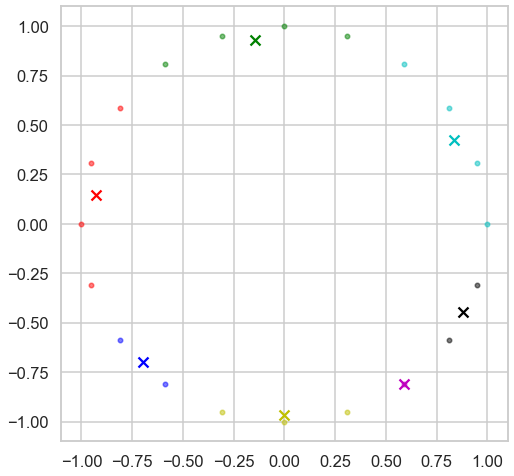

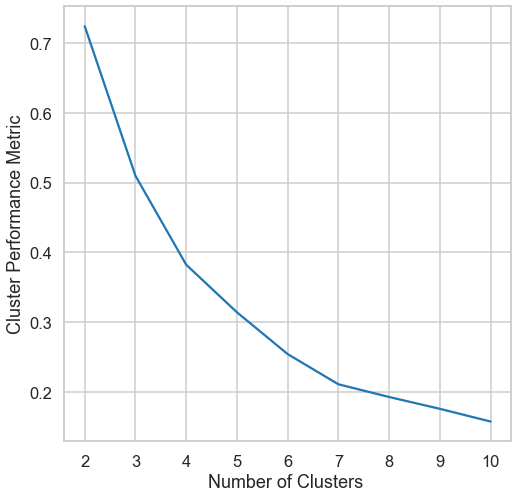

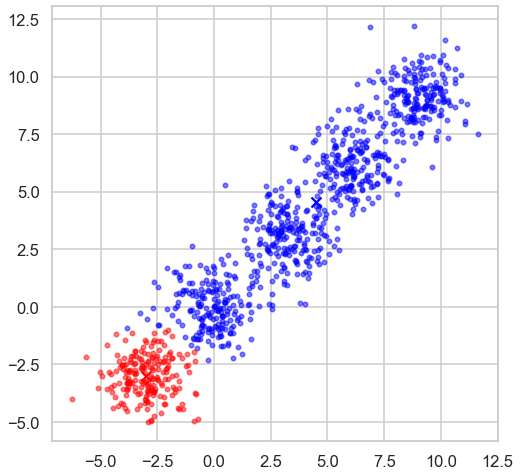

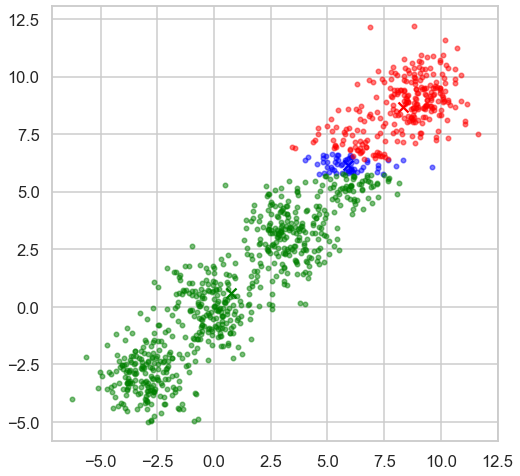

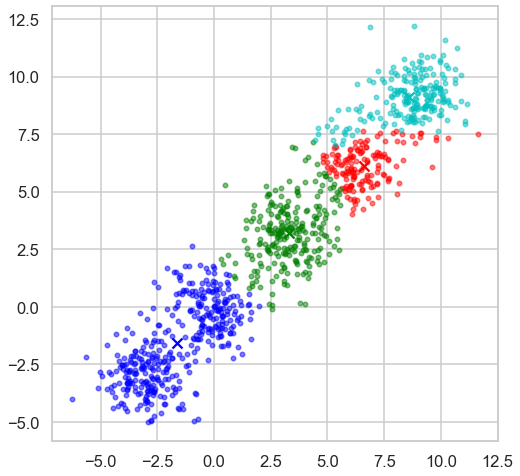

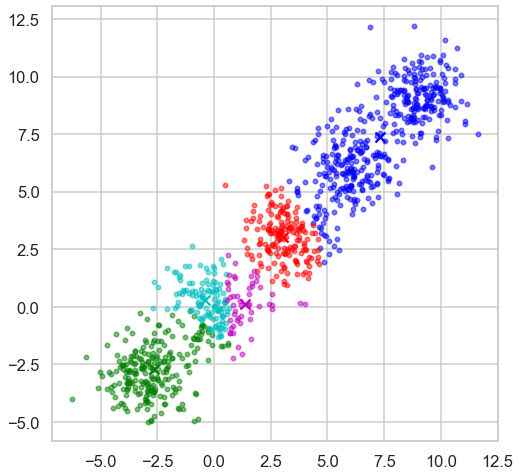

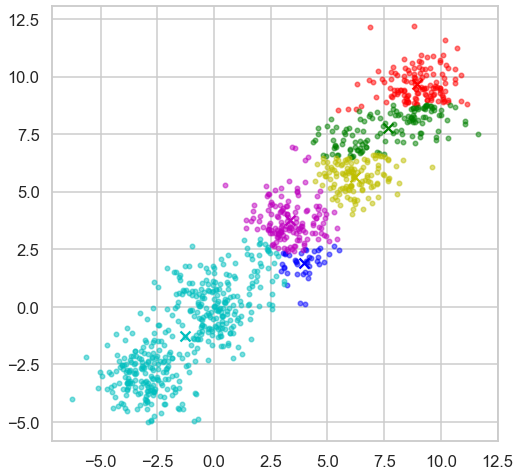

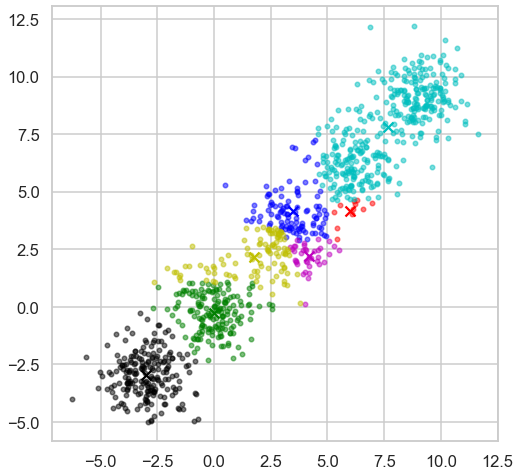

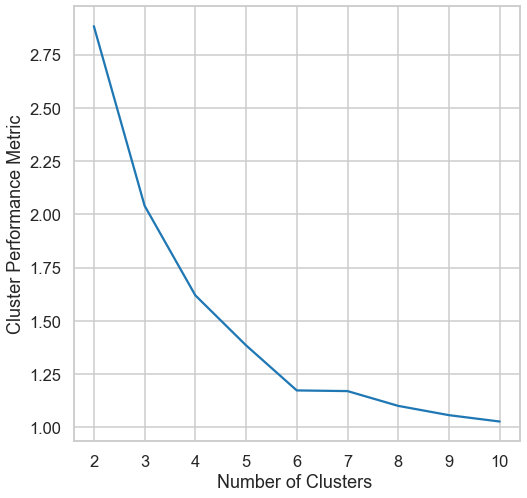

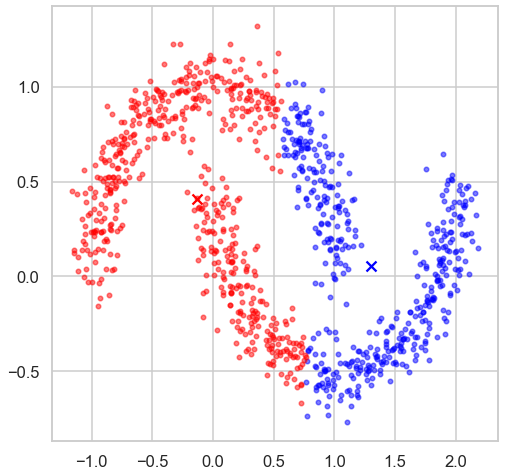

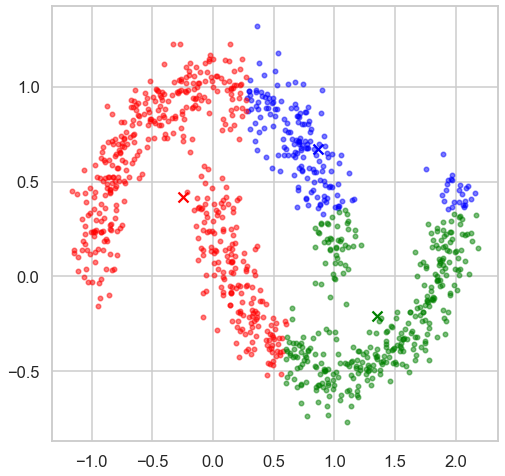

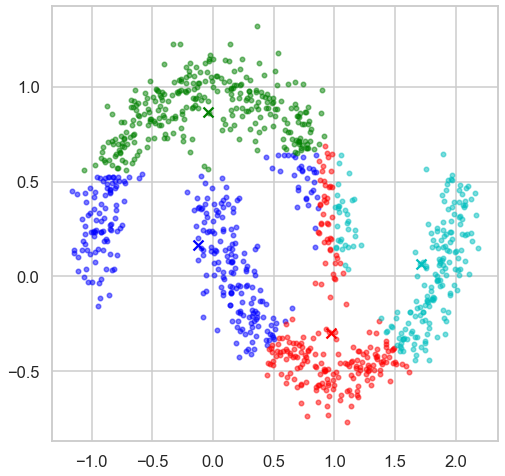

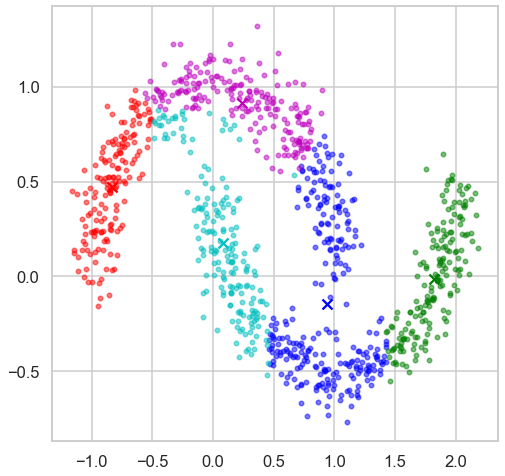

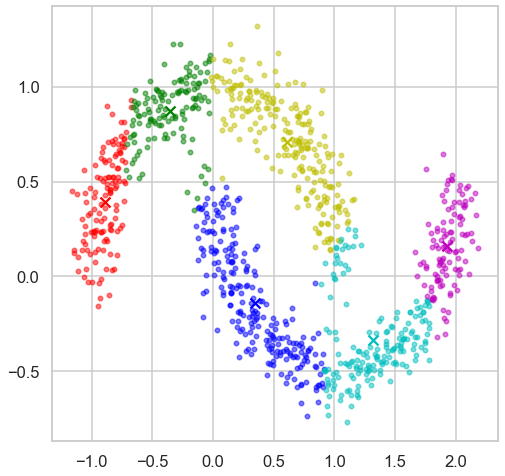

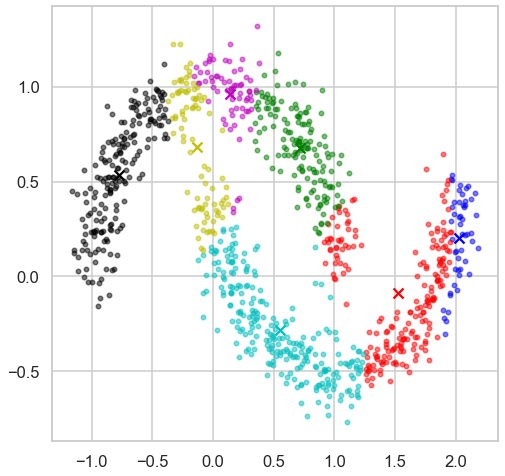

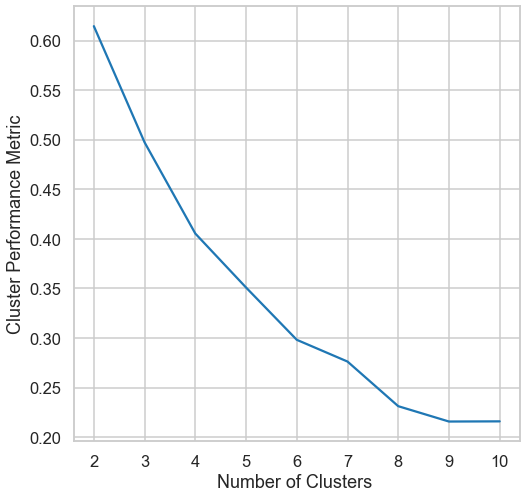

In [406]:

#plots for clustring data from 2 till 8(we only have 7 colours) using eculidian

for k in range(2,8):
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X1.copy(), k , 'Ecluidian' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(X1,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()

min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(100)    
    for i in range (100):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X1.copy(), k , 'Ecluidian' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()    
        
####################################################################################################

for k in range (2,8):    
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X2.copy(), k , 'Ecluidian' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(X2,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()
    
min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(100)    
    for i in range (100):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X2.copy(), k , 'Ecluidian' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()       
    
####################################################################################################

for k in range(2,8):    
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X3.copy(), k , 'Ecluidian' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(X3,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()
    
min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(100)    
    for i in range (100):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X3.copy(), k , 'Ecluidian' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()   



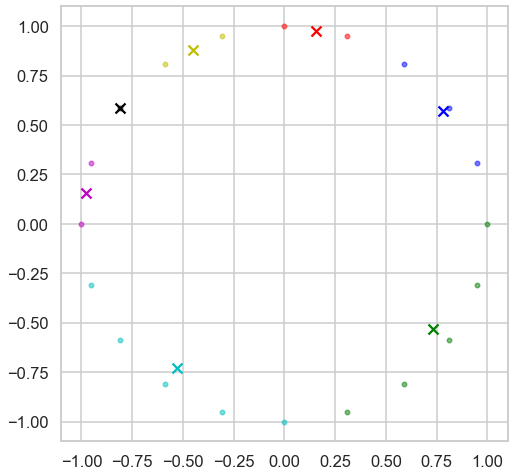

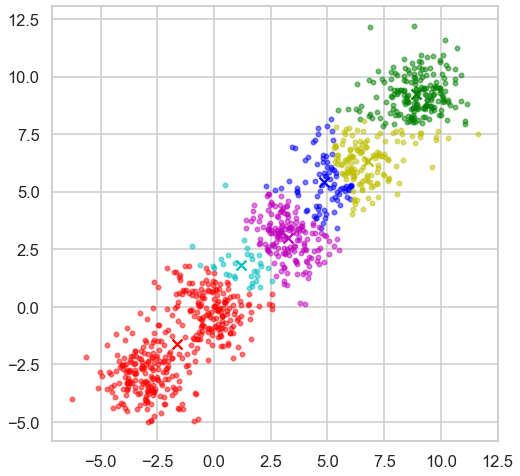

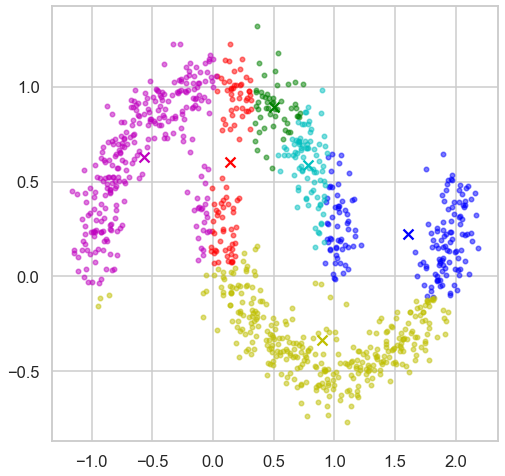

In [408]:
# for example 1 best k = 7
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X1.copy(), 7 , 'Ecluidian' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(X1,num_clusters=7,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()

# for example 2 best k = 6
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X2.copy(), 6 , 'Ecluidian' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(X2,num_clusters=6,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()
    
# for example 3 best k = 6
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X3.copy(), 6 , 'Ecluidian' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(X3,num_clusters=6,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()

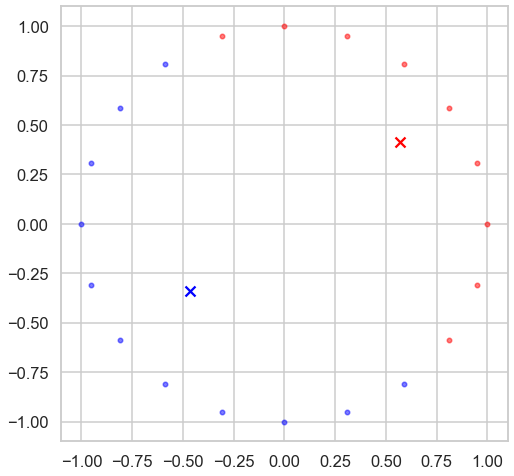

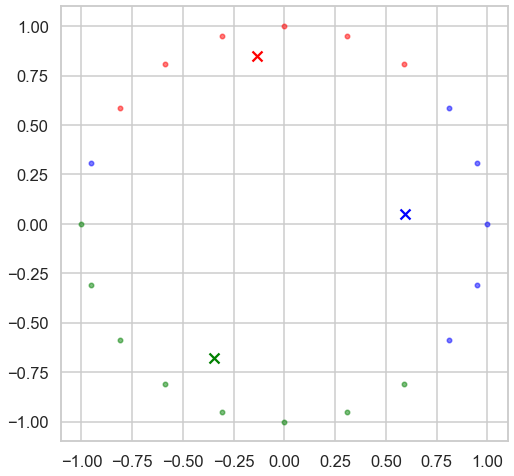

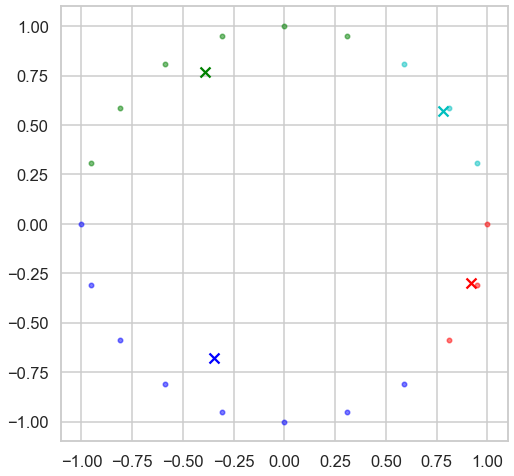

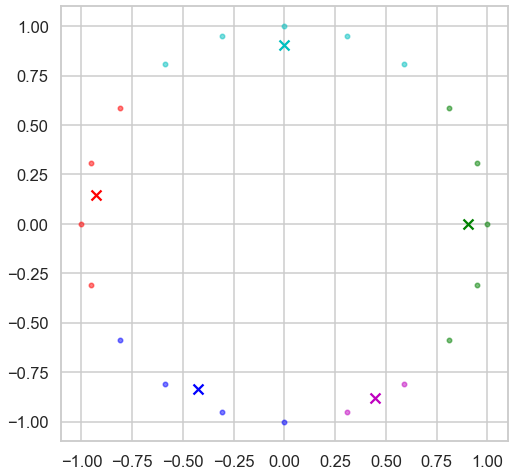

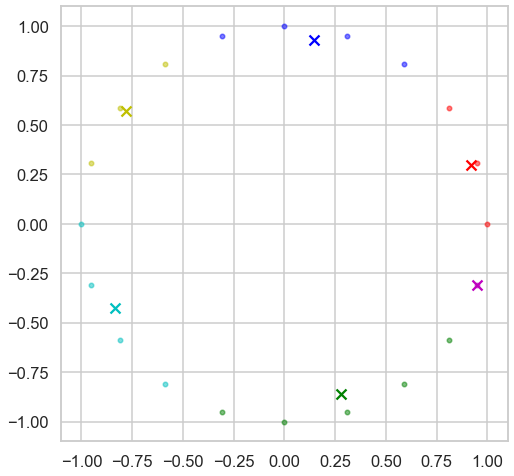

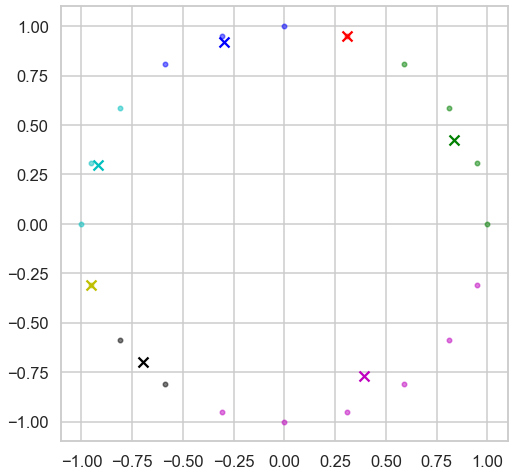

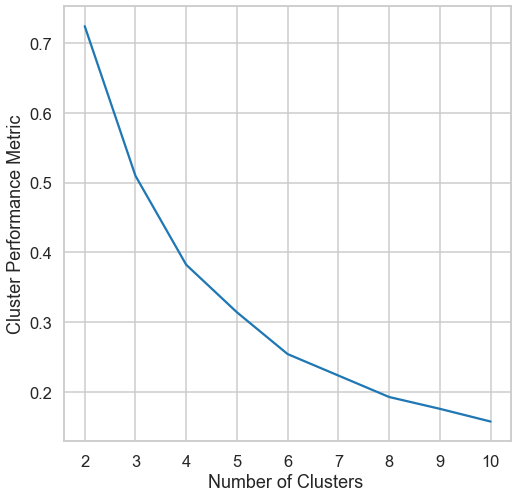

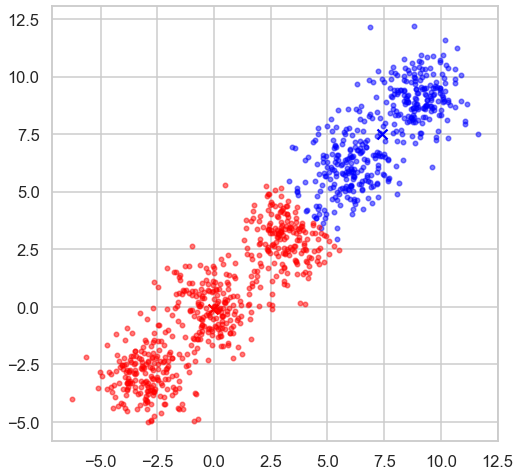

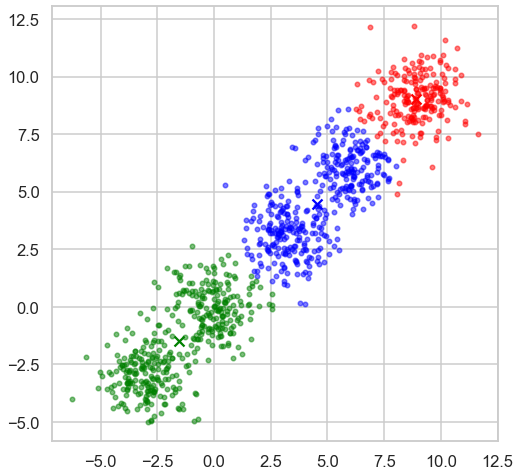

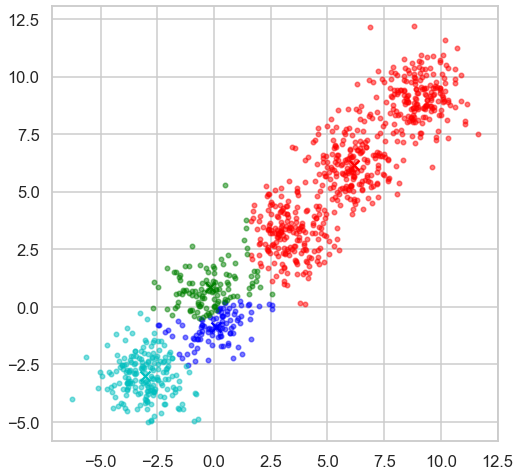

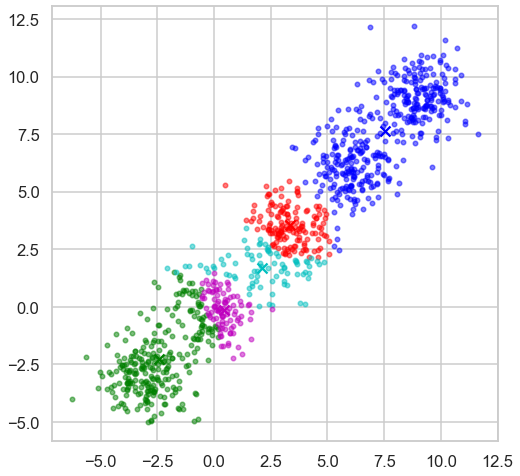

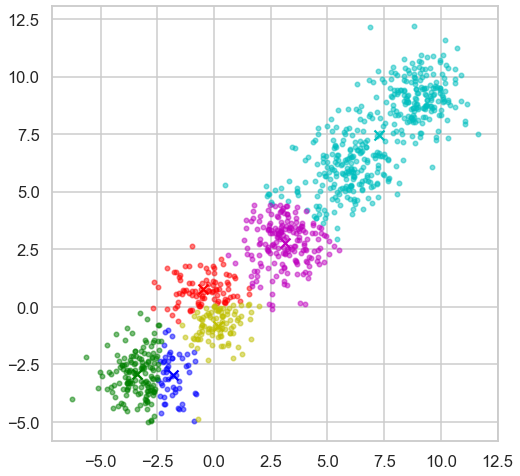

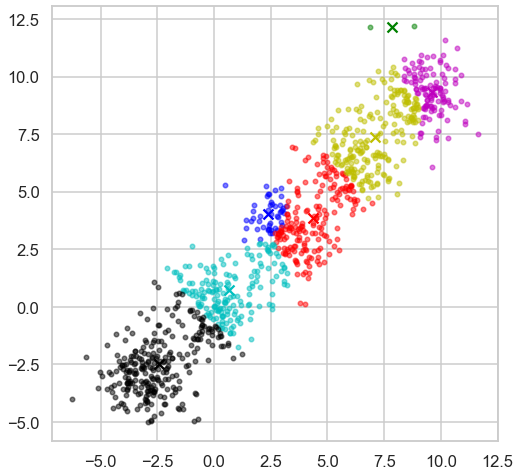

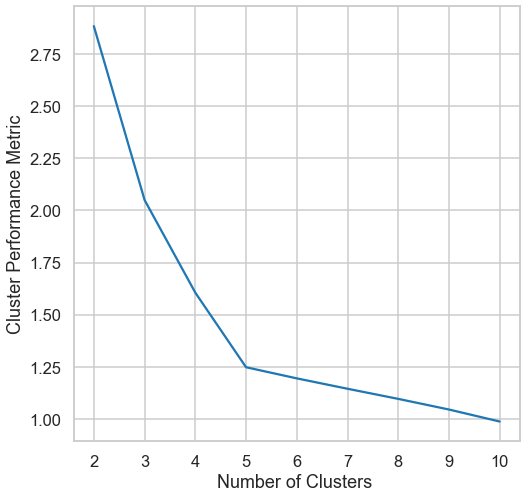

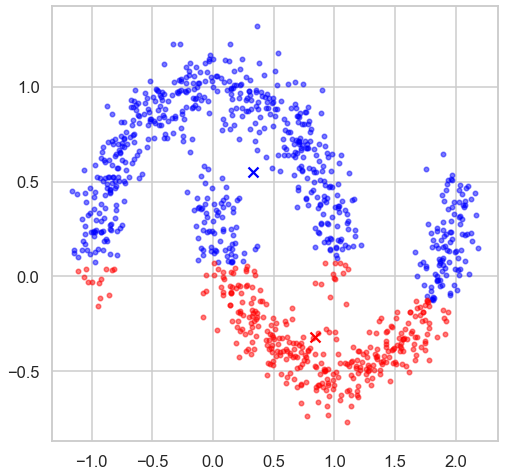

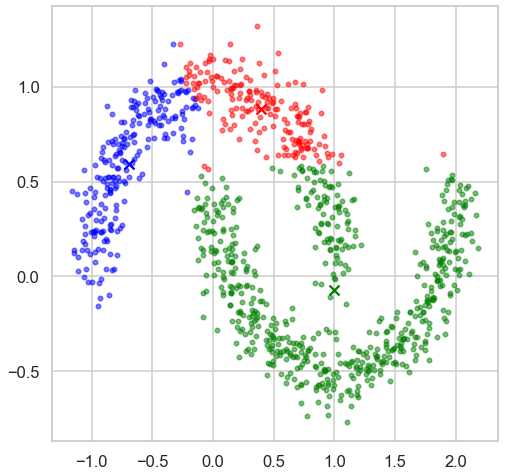

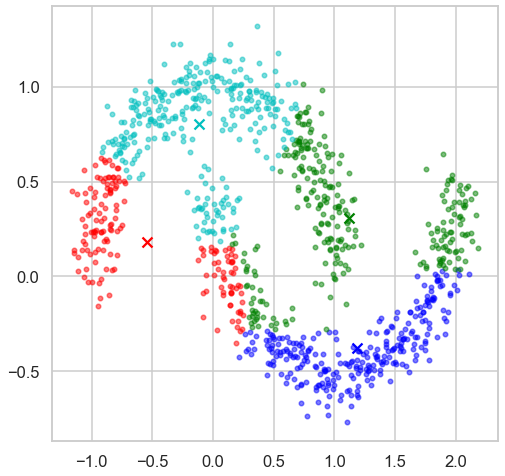

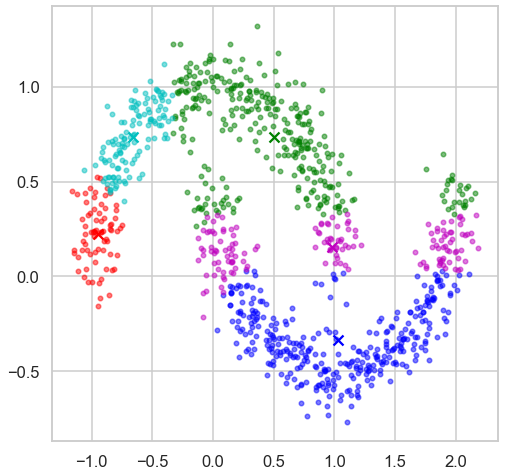

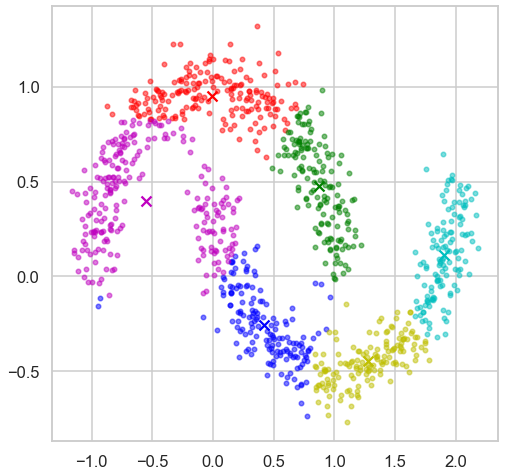

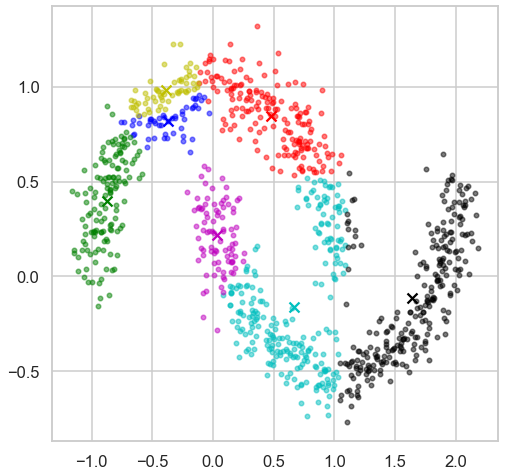

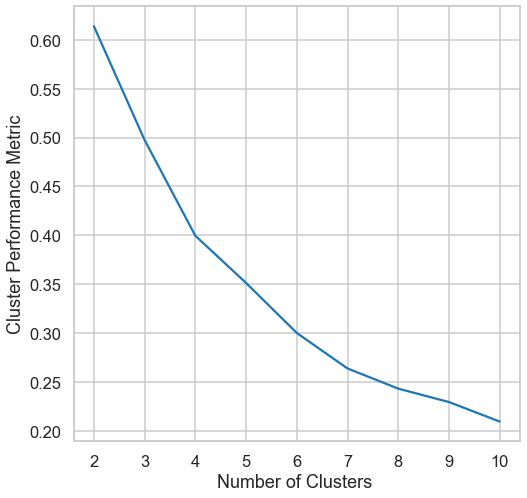

In [409]:
for k in range(2,8):
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X1.copy(), k , 'pearson' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(X1,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()

min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(100)    
    for i in range (100):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X1.copy(), k , 'pearson' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()    
        
####################################################################################################

for k in range (2,8):    
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X2.copy(), k , 'pearson' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(X2,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()
    
min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(100)    
    for i in range (100):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X2.copy(), k , 'pearson' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()       
    
####################################################################################################

for k in range(2,8):    
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X3.copy(), k , 'pearson' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(X3,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()
    
min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(100)    
    for i in range (100):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X3.copy(), k , 'pearson' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()   



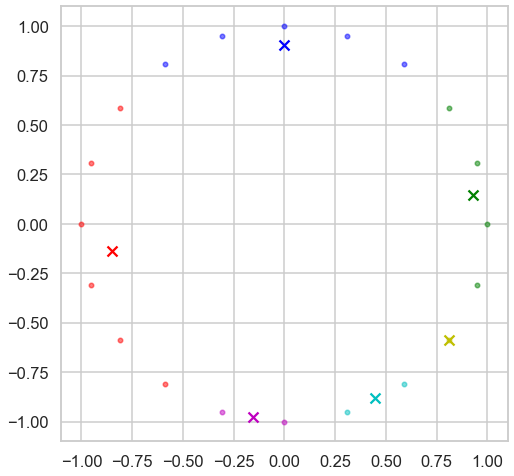

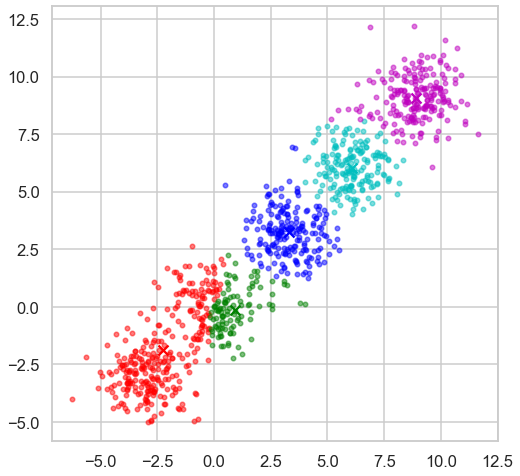

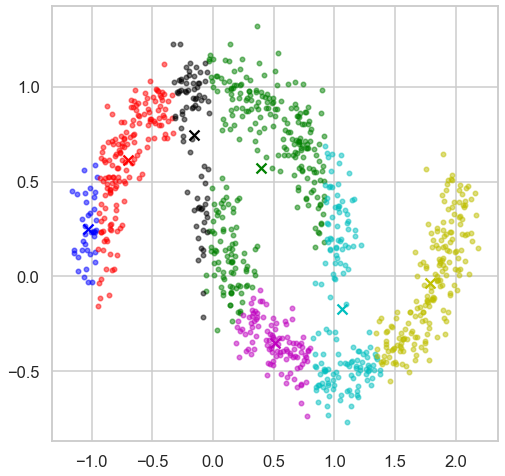

In [410]:
# for example 1 best k = 6
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X1.copy(), 6 , 'pearson' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(X1,num_clusters=6,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()

# for example 2 best k = 5
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X2.copy(), 5 , 'pearson' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(X2,num_clusters=5,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()
    
# for example 3 best k = 7
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (X3.copy(), 7 , 'pearson' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(X3,num_clusters=7,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [387]:
data= pd.read_csv('customer.csv',usecols=['Age','Income'])
data.head()


Age  Income
0   67  124670
1   22  150773
2   49   89210
3   45  171565
4   53  149031

In [388]:
from sklearn.preprocessing import StandardScaler
x=data.values
scaler = StandardScaler()
scaler.fit(x)
data_scaled=scaler.transform(data)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

0         1
0  2.653614  0.097524
1 -1.187132  0.782654
2  1.117316 -0.833202
3  0.775916  1.328386
4  1.458716  0.736932

In [389]:
x_data = data_scaled.iloc[:,:].values
x_data

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

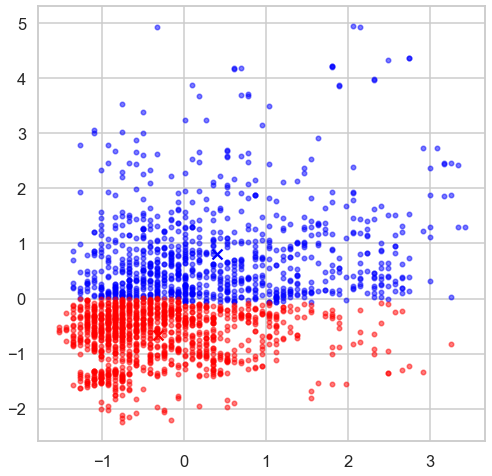

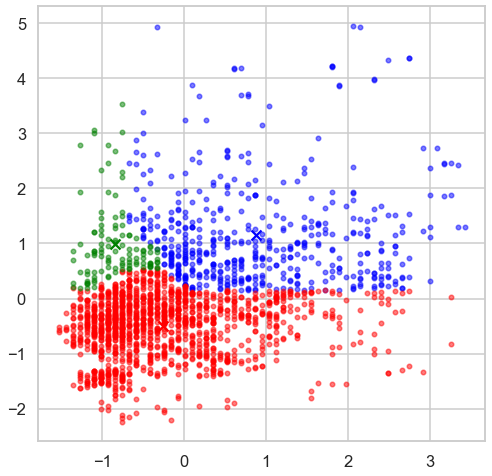

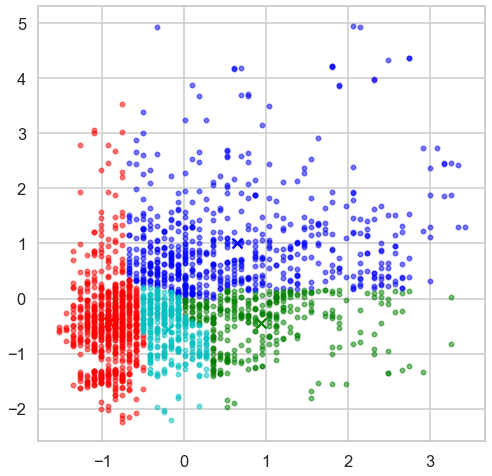

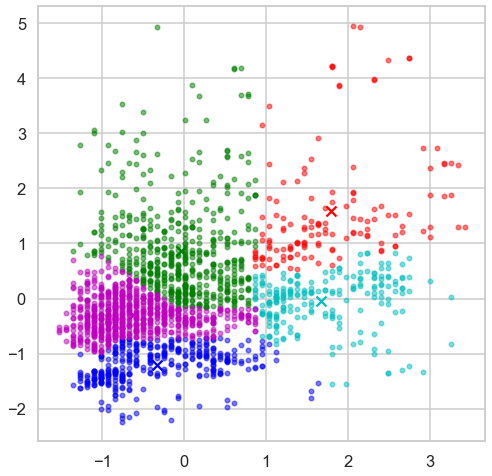

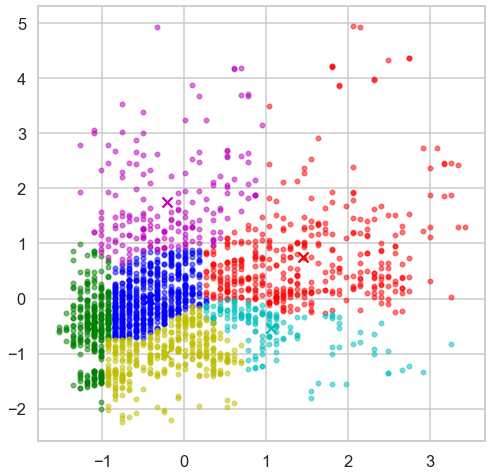

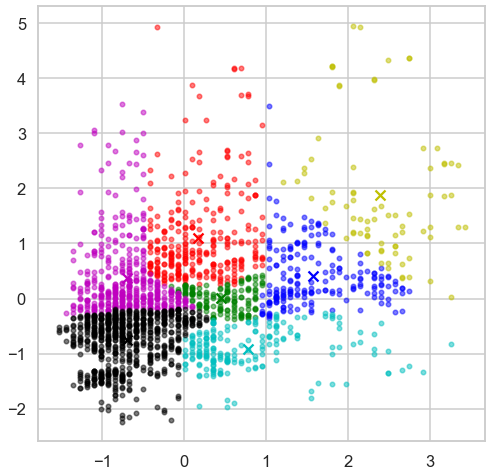

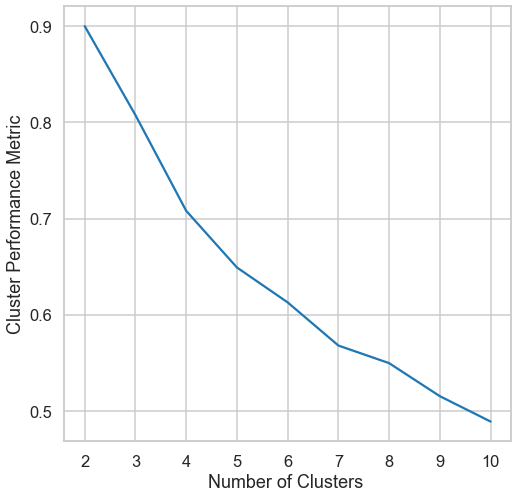

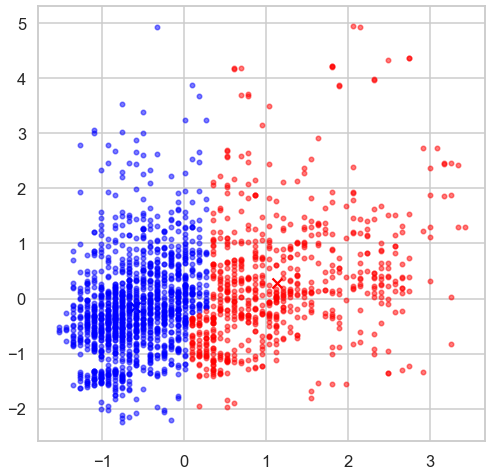

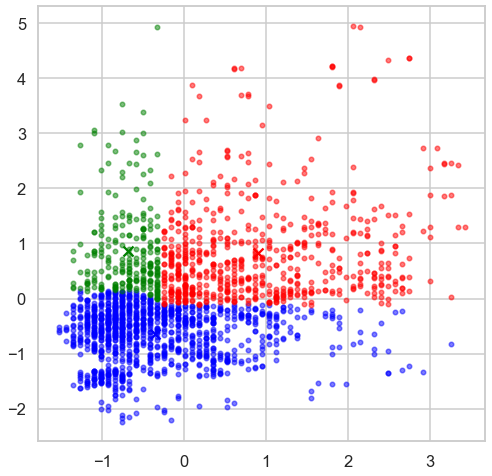

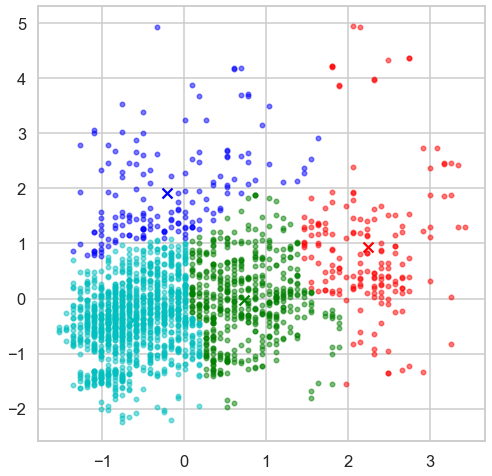

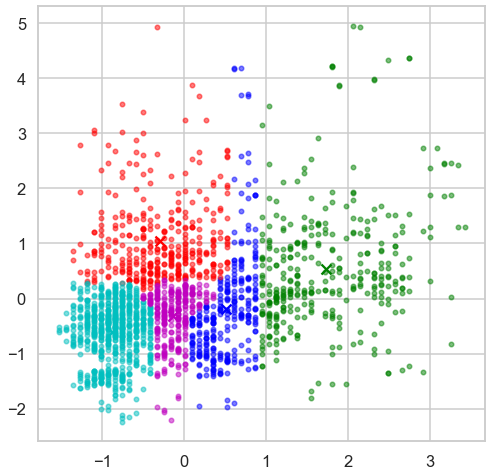

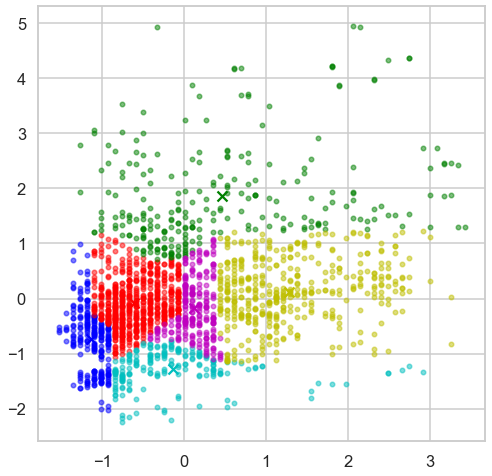

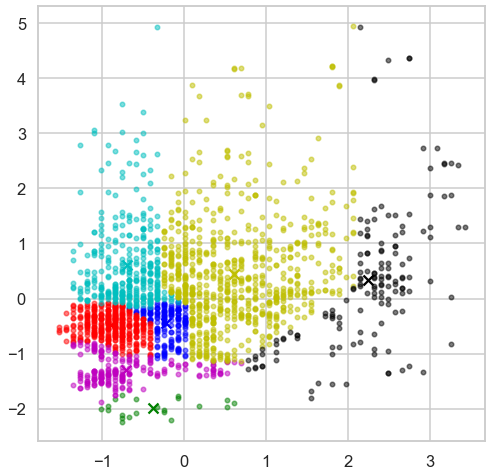

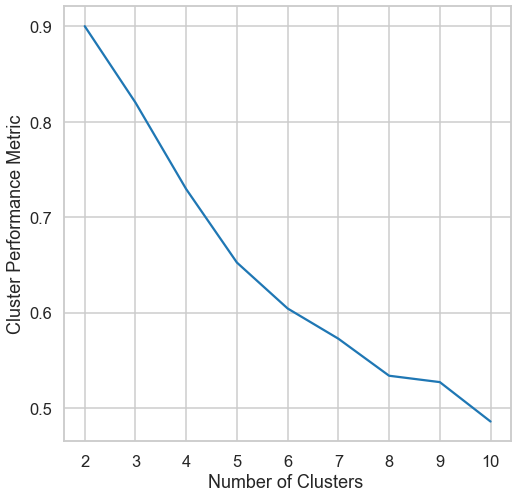

In [405]:
#plots for clustring data from 2 till 8(we only have 7 colours) using eculidian
for k in range(2,8):
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (x_data.copy(), k , 'Ecluidian' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(x_data,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()

min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(15)    
    for i in range (15):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (x_data.copy(), k , 'Ecluidian' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()    
        

#plots for clustring data from 2 till 8(we only have 7 colours) using pearson
for k in range(2,8):
    new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (x_data.copy(), k , 'pearson' )
    index_of_centroids_np=np.array(index_of_centroids)
    display_cluster(x_data,num_clusters=k,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
    plt.show()

min_cluster_metric=np.zeros(9)
for k in range (2,11):
    cluster_metric_matrix = np.zeros(10)    
    for i in range (10):
        new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (x_data.copy(), k , 'pearson' )
        cluster_metric_matrix[i]=cluster_metric
    min_cluster_metric[k-2]= cluster_metric_matrix.min()
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z, min_cluster_metric)
plt.ylabel('Cluster Performance Metric')
plt.xlabel('Number of Clusters ')
plt.show()    

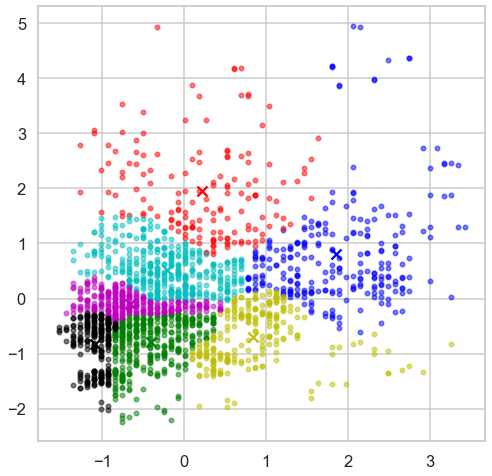

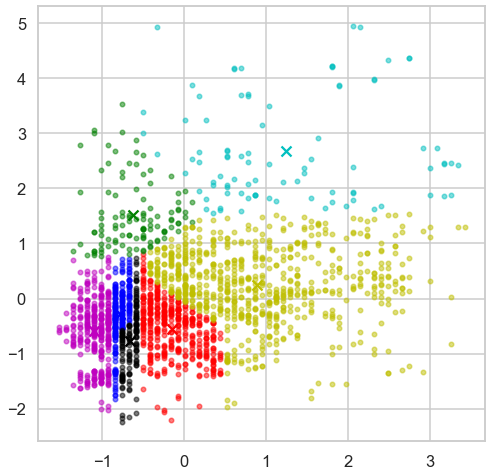

In [412]:
# for data in ecuilidian best k = 7
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (x_data.copy(), 7 , 'Ecluidian' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(x_data,num_clusters=7,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()

# for data in pearson best k = 8 however no colours so we will take k =7
new_centroids,index_of_centroids,cluster_metric=GUC_Kmean (x_data.copy(), 7 , 'pearson' )
index_of_centroids_np=np.array(index_of_centroids)
display_cluster(x_data,num_clusters=7,cluster_centers_ = new_centroids,labels_ = index_of_centroids )
plt.show()
    
